## Load MNIST dataset

In [22]:
from keras.datasets import mnist

In [32]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

In [35]:
y_train.shape

(60000,)

In [36]:
y_test.shape

(10000,)

## Visualize the training sets

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

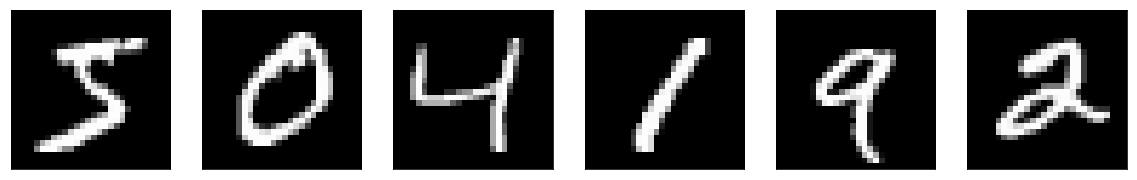

In [38]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')



In [39]:
#X_train = X_train.reshape(60000,784).astype('float32')
#X_test = X_test.reshape(60000,784).astype('float32')

Each image hs pixels between 0 and 255

In [40]:
X_train = X_train.astype('float32')/255

In [41]:
X_test = X_test.astype('float32')/255

# Encode categorical values as one hot vectors as part of label preprocessing

In [42]:

from keras.utils import np_utils

In [43]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## Model architecture

In [44]:

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
model=Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Compilation

In [45]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

In [48]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.2900%


***To Try
￼ Remove the dropout layers in the network. Do you notice evidence of overfitting? ￼
 Remove the ReLU activation functions. Does the accuracy decrease? ￼ 
 Remove the image pre-processing step with dividing every pixel by 255. Does the accuracy decrease? ￼
 Try a different optimizer, such as stochastic gradient descent. ￼
 Increase (or decrease) the batch size.

### 1. To Try ￼ Remove the dropout layers in the network

In [49]:

model=Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dense(10,activation='softmax'))
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

In [52]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.8000%


## Assignment 2- In this notebook, we visualize four activation maps in a CNN layer.

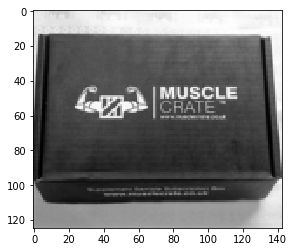

In [55]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = '/Users/shashank/Desktop/MUSCLEC.jpg'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

## Specify filters

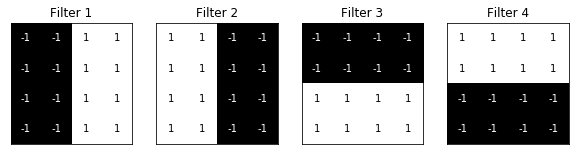

In [56]:
import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# Visualize activation maps for each filter

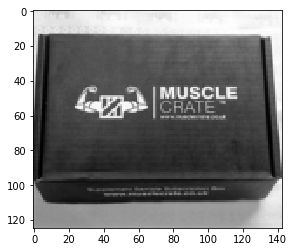

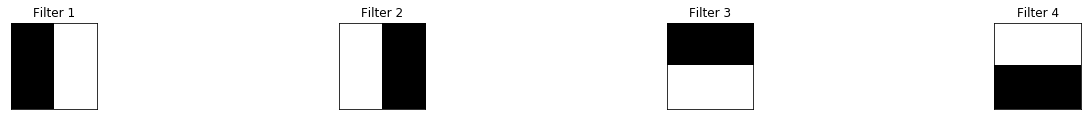

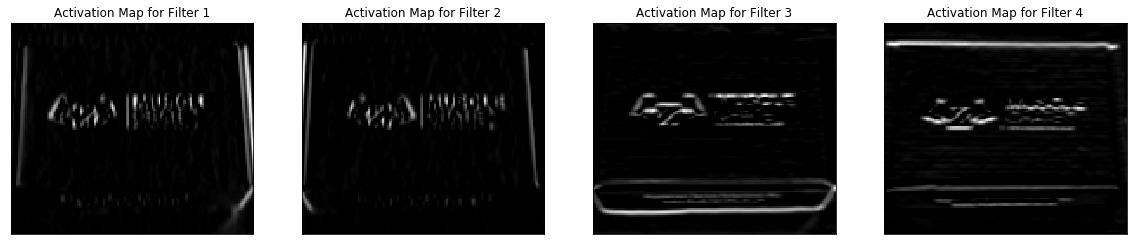

In [59]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

# plot image
plt.imshow(small_img, cmap='gray')

# define a neural network with a single convolutional layer with one filter
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1)))

# apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# visualize all activation maps
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))

